In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 7

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 7)                 77        
                                                                 
Total params: 1,147
Trainable params: 1,147
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/13 [=>............................] - ETA: 8s - loss: 2.1216 - accuracy: 0.1094
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 1s 31ms/step - loss: 2.0945 - accuracy: 0.0953 - val_loss: 1.9189 - val_accuracy: 0.1568
Epoch 2/1000
 1/13 [=>............................] - ETA: 0s - loss: 2.0379 - accuracy: 0.1172
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 8ms/step - loss: 1.9475 - accuracy: 0.1556 - val_loss: 1.8285 - val_accuracy: 0.2343
Epoch 3/1000
 1/13 [=>............................] - ETA: 0s - loss: 1.8790 - accuracy: 0.2266
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 8ms/step - loss: 1.8695 - accuracy: 0.2066 - val_loss: 1.7573 - val_accuracy: 0.3173
Epoch 4/1000
 1/13 [=>............................] - ETA: 0s - loss: 1.7924 - accuracy: 0.2344


 1/13 [=>............................] - ETA: 0s - loss: 1.1578 - accuracy: 0.4688
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 8ms/step - loss: 1.0993 - accuracy: 0.5486 - val_loss: 0.9267 - val_accuracy: 0.6882
Epoch 29/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.9959 - accuracy: 0.5859
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 7ms/step - loss: 1.0726 - accuracy: 0.5756 - val_loss: 0.9042 - val_accuracy: 0.6882
Epoch 30/1000
 1/13 [=>............................] - ETA: 0s - loss: 1.0943 - accuracy: 0.5469
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 8ms/step - loss: 1.0511 - accuracy: 0.5806 - val_loss: 0.8858 - val_accuracy: 0.6900
Epoch 31/1000
 1/13 [=>............................] - ETA: 0s - loss: 1.1704 - accuracy: 0.5312
Epoch 31

 1/13 [=>............................] - ETA: 0s - loss: 0.8520 - accuracy: 0.6797
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 8ms/step - loss: 0.8578 - accuracy: 0.6451 - val_loss: 0.6452 - val_accuracy: 0.8284
Epoch 56/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.8521 - accuracy: 0.6484
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 8ms/step - loss: 0.8336 - accuracy: 0.6654 - val_loss: 0.6389 - val_accuracy: 0.8339
Epoch 57/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.8069 - accuracy: 0.6719
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 9ms/step - loss: 0.8458 - accuracy: 0.6808 - val_loss: 0.6327 - val_accuracy: 0.8303
Epoch 58/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.8223 - accuracy: 0.6797
Epoch 58

 1/13 [=>............................] - ETA: 0s - loss: 0.6671 - accuracy: 0.7188
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 8ms/step - loss: 0.7127 - accuracy: 0.7109 - val_loss: 0.5456 - val_accuracy: 0.8524
Epoch 83/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.5998 - accuracy: 0.7812
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 7ms/step - loss: 0.7234 - accuracy: 0.7097 - val_loss: 0.5409 - val_accuracy: 0.8358
Epoch 84/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.7557 - accuracy: 0.6797
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 7ms/step - loss: 0.7504 - accuracy: 0.6913 - val_loss: 0.5338 - val_accuracy: 0.8524
Epoch 85/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.6625 - accuracy: 0.7266
Epoch 85

 1/13 [=>............................] - ETA: 0s - loss: 0.7112 - accuracy: 0.7031
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 8ms/step - loss: 0.7415 - accuracy: 0.6937 - val_loss: 0.4983 - val_accuracy: 0.8727
Epoch 110/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.6978 - accuracy: 0.7422
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 8ms/step - loss: 0.7047 - accuracy: 0.7312 - val_loss: 0.5000 - val_accuracy: 0.8745
Epoch 111/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.7356 - accuracy: 0.6875
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 7ms/step - loss: 0.7097 - accuracy: 0.7140 - val_loss: 0.4998 - val_accuracy: 0.8745
Epoch 112/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.6893 - accuracy: 0.7031
Ep

Epoch 136/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.6186 - accuracy: 0.7656
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 8ms/step - loss: 0.6667 - accuracy: 0.7226 - val_loss: 0.4610 - val_accuracy: 0.8819
Epoch 137/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.7696 - accuracy: 0.6562
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 8ms/step - loss: 0.6442 - accuracy: 0.7429 - val_loss: 0.4603 - val_accuracy: 0.8801
Epoch 138/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.5966 - accuracy: 0.7812
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 8ms/step - loss: 0.6813 - accuracy: 0.7349 - val_loss: 0.4583 - val_accuracy: 0.8819
Epoch 139/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.6634 - accu

Epoch 163/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.5997 - accuracy: 0.7656
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 8ms/step - loss: 0.6317 - accuracy: 0.7466 - val_loss: 0.4337 - val_accuracy: 0.8856
Epoch 164/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.7685 - accuracy: 0.6562
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 7ms/step - loss: 0.6664 - accuracy: 0.7300 - val_loss: 0.4340 - val_accuracy: 0.8893
Epoch 165/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.6891 - accuracy: 0.7422
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 7ms/step - loss: 0.6431 - accuracy: 0.7491 - val_loss: 0.4311 - val_accuracy: 0.8856
Epoch 166/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.7167 - accu

Epoch 190/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.6626 - accuracy: 0.7266
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 9ms/step - loss: 0.6174 - accuracy: 0.7546 - val_loss: 0.4156 - val_accuracy: 0.8967
Epoch 191/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.6786 - accuracy: 0.7656
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 8ms/step - loss: 0.6286 - accuracy: 0.7632 - val_loss: 0.4157 - val_accuracy: 0.8911
Epoch 192/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.5654 - accuracy: 0.7734
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 8ms/step - loss: 0.6359 - accuracy: 0.7442 - val_loss: 0.4163 - val_accuracy: 0.8948
Epoch 193/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.4670 - accu

Epoch 217/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.6037 - accuracy: 0.7188
Epoch 217: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 8ms/step - loss: 0.5898 - accuracy: 0.7712 - val_loss: 0.4063 - val_accuracy: 0.8911
Epoch 218/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.6099 - accuracy: 0.7344
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 7ms/step - loss: 0.5825 - accuracy: 0.7786 - val_loss: 0.4061 - val_accuracy: 0.8985
Epoch 219/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.5972 - accuracy: 0.7891
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 8ms/step - loss: 0.5788 - accuracy: 0.7829 - val_loss: 0.4020 - val_accuracy: 0.8893
Epoch 220/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.5276 - accu

Epoch 244/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.6447 - accuracy: 0.7656
Epoch 244: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 8ms/step - loss: 0.6117 - accuracy: 0.7645 - val_loss: 0.3948 - val_accuracy: 0.8930
Epoch 245/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.5181 - accuracy: 0.8047
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 9ms/step - loss: 0.5961 - accuracy: 0.7681 - val_loss: 0.3955 - val_accuracy: 0.8967
Epoch 246/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.5310 - accuracy: 0.7734
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 8ms/step - loss: 0.5980 - accuracy: 0.7620 - val_loss: 0.3946 - val_accuracy: 0.8967
Epoch 247/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.6678 - accu

Epoch 271/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.5933 - accuracy: 0.7969
Epoch 271: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 8ms/step - loss: 0.5899 - accuracy: 0.7724 - val_loss: 0.3839 - val_accuracy: 0.8985
Epoch 272/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.4888 - accuracy: 0.8125
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 7ms/step - loss: 0.5839 - accuracy: 0.7860 - val_loss: 0.3811 - val_accuracy: 0.8967
Epoch 273/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.6738 - accuracy: 0.7734
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 8ms/step - loss: 0.5897 - accuracy: 0.7841 - val_loss: 0.3829 - val_accuracy: 0.8967
Epoch 273: early stopping


In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

5/5 [==============================] - 0s 4ms/step - loss: 0.3829 - accuracy: 0.8967


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 157ms/step
[2.6159012e-04 1.3200262e-04 3.9173998e-03 4.6370942e-03 9.3637158e-07
 5.0057173e-01 4.9047917e-01]
5


# Confusion matrix

17/17 [==============================] - 0s 974us/step


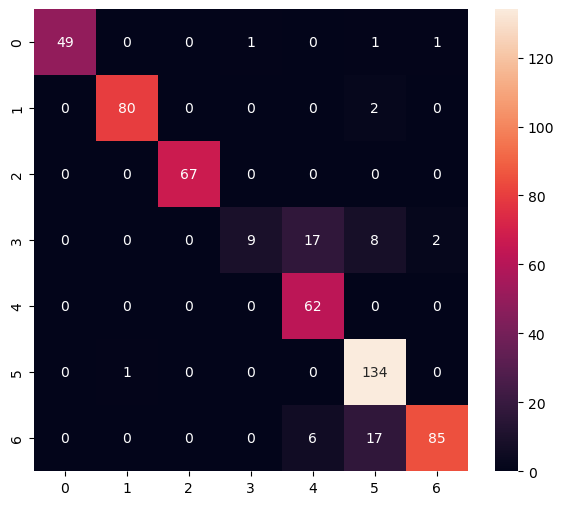

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        52
           1       0.99      0.98      0.98        82
           2       1.00      1.00      1.00        67
           3       0.90      0.25      0.39        36
           4       0.73      1.00      0.84        62
           5       0.83      0.99      0.90       135
           6       0.97      0.79      0.87       108

    accuracy                           0.90       542
   macro avg       0.92      0.85      0.85       542
weighted avg       0.91      0.90      0.89       542



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\jasha\AppData\Local\Temp\tmpwfk5ux94\assets


INFO:tensorflow:Assets written to: C:\Users\jasha\AppData\Local\Temp\tmpwfk5ux94\assets


6676

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.6158988e-04 1.3200250e-04 3.9174007e-03 4.6370947e-03 9.3637180e-07
 5.0057185e-01 4.9047905e-01]
5
